In [1]:

import numpy as np
import pandas as pd 


In [2]:
df = pd.read_csv('digit-recognizer/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
35812,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19507,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1335,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt

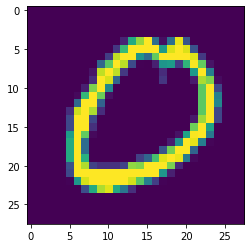

In [6]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [7]:
X= df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape

(33600, 784)

In [11]:
X_test.shape

(8400, 784)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
import time
start = time.time()
y_pred = knn.predict(X_test)

print(time.time()-start)

24.437909364700317


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [17]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
#PCA
from sklearn.decomposition import PCA
pca =PCA(n_components = 100)

In [20]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [21]:
X_train.shape

(33600, 784)

In [22]:
X_train_trf.shape

(33600, 100)

In [23]:
X_test.shape

(8400, 784)

In [24]:
knn = KNeighborsClassifier()

In [25]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(X_test_trf)

In [27]:
accuracy_score(y_test,y_pred)

0.1419047619047619

In [ ]:
for i in range(1,785):
    pca =PCA(n_components = i )
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.fit_transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))

0.10023809523809524
0.0736904761904762
0.10654761904761904
0.11892857142857143
0.1294047619047619
0.13297619047619047
0.13452380952380952
0.1442857142857143
0.11761904761904762
0.14595238095238094
0.15
0.13642857142857143
0.13535714285714287
0.13726190476190475
0.15654761904761905
0.1457142857142857
0.1467857142857143
0.14821428571428572
0.1525
0.14952380952380953
0.15892857142857142
0.1605952380952381
0.14785714285714285
0.1586904761904762
0.1626190476190476
0.15023809523809523
0.15738095238095237
0.165
0.15107142857142858
0.16023809523809524
0.1611904761904762
0.15392857142857144
0.15273809523809523
0.15392857142857144
0.15630952380952381
0.15154761904761904
0.15773809523809523
0.15392857142857144
0.15988095238095237
0.15226190476190476
0.15476190476190477
0.15452380952380954
0.15392857142857144
0.15833333333333333
0.15595238095238095
0.14904761904761904
0.15535714285714286
0.15154761904761904
0.15083333333333335
0.1530952380952381
0.1467857142857143
0.1467857142857143
0.142738095238

0.1211904761904762
0.11928571428571429
0.12083333333333333
0.11833333333333333
0.1194047619047619
0.12059523809523809
0.12083333333333333
0.11916666666666667
0.11988095238095238
0.11845238095238095
0.11892857142857143
0.1194047619047619
0.12059523809523809
0.12
0.1175
0.12154761904761904
0.11976190476190476
0.12047619047619047
0.12
0.12
0.11904761904761904
0.12011904761904763
0.11880952380952381
0.12011904761904763
0.1194047619047619
0.11797619047619047
0.1186904761904762
0.11821428571428572
0.11904761904761904
0.11916666666666667
0.11892857142857143
0.11857142857142858
0.11880952380952381
0.11821428571428572
0.12011904761904763
0.1186904761904762
0.12035714285714286
0.11976190476190476
0.11785714285714285
0.11928571428571429
0.11952380952380952
0.11773809523809524
0.11880952380952381
0.11714285714285715
0.11892857142857143
0.11964285714285715
0.11857142857142858
0.1186904761904762
0.11892857142857143
0.12011904761904763
0.11892857142857143
0.11773809523809524
0.1194047619047619
0.1175

In [ ]:
#transformating to 2d coordinate system 
pca =PCA(n_components = 2 )
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [ ]:
X_train_trf

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig  = px.scatter(x=X_train_trf[:,0],
                 y = X_train_trf[:,1],
                 color = y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

In [ ]:
#transformating to 3d
pca =PCA(n_components = 3 )
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [ ]:
X_train_trf

In [ ]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df,x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],
                   color=y_train_trf)
fig.update_layout(margin=dict(l=20, t=20, b=20))

fig.show()

In [ ]:
pca.explained_variance_
#Eigen values

In [ ]:
pca.components_
#Eigen vectors

In [ ]:
pca.components_.shape
#Eigen vectors shape

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca =PCA(n_components =None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_.shape

In [ ]:
pca.components_.shape

In [ ]:
pca.explained_variance_ratio_

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))